In [2]:
import os
import sys

print(os.getcwd())
cwd0 = '../config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import fg, hl, bg
vID.init(cwd0)
import tools4pyPC as t4p

/home/romuald/ANALYSE/pyPCPrivate/HMO


**Start at:** Saturday 03 May 2025, 10:25:10  
**Hostname:** device-9.home (Linux)

<p style="text-align: center"><img width="800px" src="../config/svg/pyPCBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

# Parameters

## Extraction of HMO parameters from Van-Catledge

*J. Org. Chem.* (1980) **45**: 4801-4802

In [1]:
# Extended HMO parameters with Streitwieser additions
import numpy as np
import pandas as pd

# One-center parameters (hx, Fx, n_pi)
one_center_params = {
    'C·':   {'hx': 0.00, 'Fx': 1.732, 'n_pi': 1},
    'B▯':   {'hx': -0.45, 'Fx': 1.705, 'n_pi': 0},
    'N·':   {'hx': 0.51, 'Fx': 1.393, 'n_pi': 1},
    'N:':   {'hx': 1.37, 'Fx': 1.583, 'n_pi': 2},
    'O·':   {'hx': 0.97, 'Fx': 0.909, 'n_pi': 1},
    'O:':   {'hx': 2.09, 'Fx': 0.942, 'n_pi': 2},
    'F:':   {'hx': 2.71, 'Fx': 0.179, 'n_pi': 2},
    'Si·':  {'hx': 0.00, 'Fx': 1.732, 'n_pi': 1},
    'P·':   {'hx': 0.19, 'Fx': 1.409, 'n_pi': 1},
    'P:':   {'hx': 0.75, 'Fx': 1.666, 'n_pi': 2},
    'S·':   {'hx': 0.46, 'Fx': 0.962, 'n_pi': 1},
    'S:':   {'hx': 1.11, 'Fx': 1.229, 'n_pi': 2},
    'Cl:':  {'hx': 1.48, 'Fx': 0.321, 'n_pi': 2},
    'Me:':  {'hx': 2.00, 'Fx': None,   'n_pi': 2},
    'Br:':  {'hx': 1.50, 'Fx': None,   'n_pi': 2},  # corrected n_pi to 2
    'N+·':  {'hx': 2.00, 'Fx': None,   'n_pi': 1},
    'O+·':  {'hx': 2.50, 'Fx': None,   'n_pi': 1}
}

# Extended k_table with Streitwieser additions (None where missing)
k_table = {
    'C·':  {'C·':1.00, 'B▯':0.73, 'N·':1.02, 'N:':0.89, 'O·':1.06, 'O:':0.66, 'F:':0.52, 'Si·':0.75, 'P·':0.77, 'P:':0.76, 'S·':0.81, 'S:':0.69, 'Cl:':0.62, 'Me:':0.70, 'Br:':0.30, 'N+·':1.00, 'O+·':1.00},
    'B▯':  {'B▯':0.87, 'N·':0.66, 'N:':0.53, 'O·':0.60, 'O:':0.35, 'F:':0.26, 'Si·':0.57, 'P·':0.53, 'P:':0.54, 'S·':0.51, 'S:':0.44, 'Cl:':0.41, 'Me:':None, 'Br:':None, 'N+·':None, 'O+·':None},
    'N·':  {'N·':1.09, 'N:':0.99, 'O·':1.14, 'O:':0.80, 'F:':0.65, 'Si·':0.72, 'P·':0.78, 'P:':0.81, 'S·':0.83, 'S:':0.78, 'Cl:':0.77, 'Me:':None, 'Br:':None, 'N+·':None, 'O+·':None},
    'N:':  {'N:':0.98, 'O·':1.13, 'O:':0.89, 'F:':0.77, 'Si·':0.43, 'P·':0.55, 'P:':0.64, 'S·':0.68, 'S:':0.73, 'Cl:':0.80, 'Me:':None, 'Br:':None, 'N+·':None, 'O+·':None},
    'O·':  {'O·':1.26, 'O:':1.02, 'F:':0.92, 'Si·':0.65, 'P·':0.75, 'P:':0.82, 'S·':0.84, 'S:':0.85, 'Cl:':0.88, 'Me:':None, 'Br:':None, 'N+·':None, 'O+·':None},
    'O:':  {'O:':0.95, 'F:':0.94, 'Si·':0.24, 'P·':0.31, 'P:':0.39, 'S·':0.43, 'S:':0.54, 'Cl:':0.70, 'Me:':None, 'Br:':None, 'N+·':None, 'O+·':None},
    'F:':  {'F:':1.04, 'Si·':0.17, 'P·':0.21, 'P:':0.22, 'S·':0.28, 'S:':0.32, 'Cl:':0.51, 'Me:':None, 'Br:':None, 'N+·':None, 'O+·':None},
    'Si·': {'Si·':0.64, 'P·':0.62, 'P:':0.52, 'S·':0.61, 'S:':0.40, 'Cl:':0.34, 'Me:':None, 'Br:':None, 'N+·':None, 'O+·':None},
    'P·':  {'P·':0.63, 'P:':0.58, 'S·':0.65, 'S:':0.48, 'Cl:':0.35, 'Me:':None, 'Br:':None, 'N+·':None, 'O+·':None},
    'P:':  {'P:':0.63, 'S·':0.65, 'S:':0.60, 'Cl:':0.55, 'Me:':None, 'Br:':None, 'N+·':None, 'O+·':None},
    'S·':  {'S·':0.68, 'S:':0.58, 'Cl:':0.52, 'Me:':None, 'Br:':None, 'N+·':None, 'O+·':None},
    'S:':  {'S:':0.63, 'Cl:':0.59, 'Me:':None, 'Br:':None, 'N+·':None, 'O+·':None},
    'Cl:': {'Cl:':0.68, 'Me:':None, 'Br:':None, 'N+·':None, 'O+·':None},
    'Me:': {'Me:':None, 'Br:':None, 'N+·':None, 'O+·':None},
    'Br:': {'Br:':None, 'N+·':None, 'O+·':None},
    'N+·': {'N+·':None, 'O+·':None},
    'O+·': {'O+·':None}
}

# Symmetrize the table
two_center_params = {}
for atom1, inner_dict in k_table.items():
    for atom2, k_value in inner_dict.items():
        two_center_params[(atom1, atom2)] = k_value
        two_center_params[(atom2, atom1)] = k_value

# DataFrames for display
one_center_df = pd.DataFrame.from_dict(one_center_params, orient='index')
display(one_center_df)

k_df = pd.DataFrame(k_table).fillna("")
display(k_df)


,hx,Fx,n_pi
C·,0.00,1.732,1
B▯,-0.45,1.705,0
N·,0.51,1.393,1
N:,1.37,1.583,2
O·,0.97,0.909,1
O:,2.09,0.942,2
F:,2.71,0.179,2
Si·,0.00,1.732,1
P·,0.19,1.409,1
P:,0.75,1.666,2


,C·,B▯,N·,N:,O·,O:,F:,Si·,P·,P:,S·,S:,Cl:,Me:,Br:,N+·,O+·
C·,1.00,,,,,,,,,,,,,,,,
B▯,0.73,0.87,,,,,,,,,,,,,,,
N·,1.02,0.66,1.09,,,,,,,,,,,,,,
N:,0.89,0.53,0.99,0.98,,,,,,,,,,,,,
O·,1.06,0.6,1.14,1.13,1.26,,,,,,,,,,,,
O:,0.66,0.35,0.8,0.89,1.02,0.95,,,,,,,,,,,
F:,0.52,0.26,0.65,0.77,0.92,0.94,1.04,,,,,,,,,,
Si·,0.75,0.57,0.72,0.43,0.65,0.24,0.17,0.64,,,,,,,,,
P·,0.77,0.53,0.78,0.55,0.75,0.31,0.21,0.62,0.63,,,,,,,,
P:,0.76,0.54,0.81,0.64,0.82,0.39,0.22,0.52,0.58,0.63,,,,,,,


## H2CO "à la main"

In [13]:
import numpy as np

# Définir la matrice
A = np.array([[0, -1.06],
              [-1.06, -0.97]])

# Calcul des valeurs propres et vecteurs propres
eigenvalues, eigenvectors = np.linalg.eigh(A)

# Affichage des résultats
print("Valeurs propres :")
print(eigenvalues)

print("\nVecteurs propres (colonnes) :")
print(eigenvectors)

lowest_eigenvector = eigenvectors[:, 0]

print("Valeur propre la plus basse :", eigenvalues[0])
print("Vecteur propre correspondant (OM la plus basse) :")
print(lowest_eigenvector)

# Calculs demandés
c1, c2 = lowest_eigenvector
print("\nCarré des coefficients :")
print(f"n_pi * c1^2 = {c1**2*2:.2f} -> q1 = {1 - c1**2*2:.2f}")
print(f"n_pi * c2^2 = {c2**2*2:.2f} -> q2 = {1 - c2**2*2:.2f}")

print("\nProduit 2 * c1 * c2 :")
print(f"{2 * c1 * c2:.2f}")

Valeurs propres :
[-1.65068649  0.68068649]

Vecteurs propres (colonnes) :
[[ 0.54034071 -0.84144633]
 [ 0.84144633  0.54034071]]
Valeur propre la plus basse : -1.6506864930160252
Vecteur propre correspondant (OM la plus basse) :
[0.54034071 0.84144633]

Carré des coefficients :
n_pi * c1^2 = 0.58 -> q1 = 0.42
n_pi * c2^2 = 1.42 -> q2 = -0.42

Produit 2 * c1 * c2 :
0.91


## rdkit


Furane (c1ccoc1):


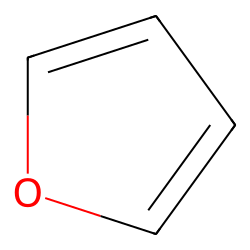

  Atome 0 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.5 (corrigé)

  Atome 1 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.5 (corrigé)

  Atome 2 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.5 (corrigé)

  Atome 3 (O): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 2, # bonds (incl. H) = 3.0, Formal charge = 0
# lone pairs ≈ 1.5~ 2.0 (corrigé)

  Atome 4 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.5 (corrigé)


Pyrrole (c1cc[nH]c1):


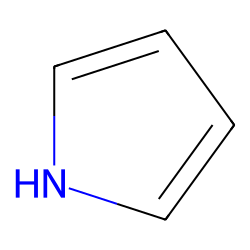

  Atome 0 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.5 (corrigé)

  Atome 1 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.5 (corrigé)

  Atome 2 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.5 (corrigé)

  Atome 3 (N): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.5~ 1.0 (corrigé)

  Atome 4 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.5 (corrigé)


Formaldéhyde (C=O):


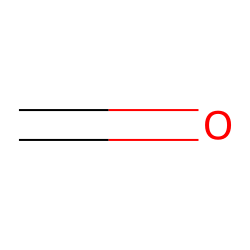

  Atome 0 (C): Hybridization = SP2, π electrons = 1, Aromatic = False
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.5 (corrigé)

  Atome 1 (O): Hybridization = SP2, π electrons = 1, Aromatic = False
# neighbours (incl. H) = 1, # bonds (incl. H) = 2.0, Formal charge = 0
# lone pairs ≈ 2.0~ 2.5 (corrigé)


Monoxyde de carbone ([C-]#[O+]):


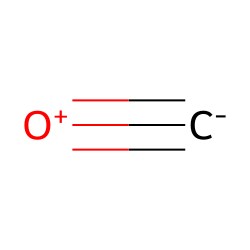

  Atome 0 (C): Hybridization = SP, π electrons = 2, Aromatic = False
# neighbours (incl. H) = 1, # bonds (incl. H) = 3.0, Formal charge = -1
# lone pairs ≈ 1.0~ 2.0 (corrigé)

  Atome 1 (O): Hybridization = SP, π electrons = 2, Aromatic = False
# neighbours (incl. H) = 1, # bonds (incl. H) = 3.0, Formal charge = 1
# lone pairs ≈ 1.0~ 2.0 (corrigé)


Acide benzoïque (c1ccc(cc1)C(=O)O):


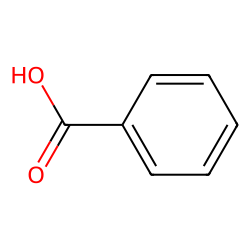

  Atome 0 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.5 (corrigé)

  Atome 1 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.5 (corrigé)

  Atome 2 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.5 (corrigé)

  Atome 3 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.5 (corrigé)

  Atome 4 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.5 (corrigé)

  Atome 5 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, For

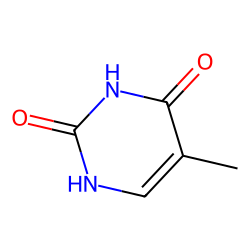

  Atome 0 (C): Hybridization = SP3, π electrons = 0, Aromatic = False
# neighbours (incl. H) = 4, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.0 (corrigé)

  Atome 1 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.5 (corrigé)

  Atome 2 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.5 (corrigé)

  Atome 3 (N): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.5~ 1.0 (corrigé)

  Atome 4 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 5.0, Formal charge = 0
# lone pairs ≈ -0.5~ 0.0 (corrigé)

  Atome 5 (O): Hybridization = SP2, π electrons = 1, Aromatic = False
# neighbours (incl. H) = 1, # bonds (incl. H) = 2.0, 

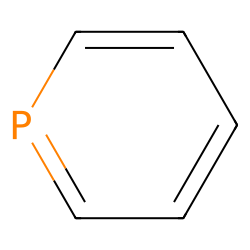

  Atome 0 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.5 (corrigé)

  Atome 1 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.5 (corrigé)

  Atome 2 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.5 (corrigé)

  Atome 3 (P): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 2, # bonds (incl. H) = 3.0, Formal charge = 0
# lone pairs ≈ 1.0~ 1.5 (corrigé)

  Atome 4 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, Formal charge = 0
# lone pairs ≈ 0.0~ 0.5 (corrigé)

  Atome 5 (C): Hybridization = SP2, π electrons = 1, Aromatic = True
# neighbours (incl. H) = 3, # bonds (incl. H) = 4.0, For

In [23]:
from rdkit import Chem
from rdkit.Chem import rdchem, Draw
from IPython.display import display

molecules = {
    'Furane': 'c1ccoc1',
    'Pyrrole': 'c1cc[nH]c1',
    'Formaldéhyde': 'C=O',
    'Monoxyde de carbone': '[C-]#[O+]',
    'Acide benzoïque': 'c1ccc(cc1)C(=O)O',
    'Thymine': 'CC1=CN(C(=O)NC1=O)',
    'Phosphabenzène': 'c1ccpcc1'
}

def get_valence_electrons(atom):
    # Tableau simplifié pour les éléments courants (on peut l'étendre si besoin)
    valence_electrons_table = {
        'H': 1,
        'C': 4,
        'N': 5,
        'O': 6,
        'P': 5,
        'S': 6,
        'F': 7,
        'Cl': 7,
        'Br': 7,
        'I': 7
    }
    return valence_electrons_table.get(atom.GetSymbol(), 0)

for name, smiles in molecules.items():
    mol = Chem.MolFromSmiles(smiles)
    print(f"\n{name} ({smiles}):")
    # Dessin de la molécule
    img = Draw.MolToImage(mol, size=(250, 250), kekulize=True)
    display(img)
    for atom in mol.GetAtoms():
        idx = atom.GetIdx()
        symbol = atom.GetSymbol()
        hybridization = atom.GetHybridization().name
        num_pi_electrons = rdchem.GetNumPiElectrons(atom)
        is_aromatic = atom.GetIsAromatic()
        total_neighbors = atom.GetTotalDegree()
        formal_charge = atom.GetFormalCharge()

        # Comptage des liaisons : liaisons explicites + H implicites (sigma)
        num_bonds_heavy = sum([bond.GetBondTypeAsDouble() for bond in atom.GetBonds()])
        num_hs = atom.GetTotalNumHs()
        num_bonds_total = num_bonds_heavy + num_hs  # inclut H
        
        valence_electrons = get_valence_electrons(atom)
        lone_pairs = (valence_electrons - num_bonds_total - formal_charge) / 2
        # Correction "chimiquement attendue" : on ajoute les électrons pi délocalisés
        lone_pairs_corrected = lone_pairs + (num_pi_electrons / 2)
        
        print(f"  Atome {idx} ({symbol}): "
              f"Hybridization = {hybridization}, "
              f"π electrons = {num_pi_electrons}, "
              f"Aromatic = {is_aromatic}\n"
              f"# neighbours (incl. H) = {total_neighbors}, "
              f"# bonds (incl. H) = {num_bonds_total}, "
              f"Formal charge = {formal_charge}\n"
              f"# lone pairs ≈ {lone_pairs}"
              f"~ {lone_pairs_corrected:.1f} (corrigé)"
             )
        print()